In [55]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from statistical_functions import probability, conditional_probability, condition_indices

In [56]:
import statistical_functions as sf # Import the module initially
# reload the module to get the updated version
import importlib
importlib.reload(sf)

<module 'statistical_functions' from 'c:\\Users\\jonat\\Python\\player-projections-bayes\\statistical_functions.py'>

In [57]:
import formatting_functions as ff # Import the module initially
# reload the module to get the updated version
import importlib
importlib.reload(ff)

<module 'formatting_functions' from 'c:\\Users\\jonat\\Python\\player-projections-bayes\\formatting_functions.py'>

In [58]:
import logging

# Reset logging by clearing any existing handlers
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Configure logging settings
logging.basicConfig(
    level=logging.INFO,  # Set the logging level to DEBUG to capture all messages
    format='%(asctime)s - %(levelname)s - %(message)s',  # Customize log message format
    handlers=[logging.StreamHandler()]  # Send log messages to the notebook output
)

# Test logging
logging.debug("This is a debug message")
logging.info("This is an info message")
logging.warning("This is a warning message")
logging.error("This is an error message")
logging.critical("This is a critical message")

2024-09-21 23:57:57,385 - INFO - This is an info message
2024-09-21 23:57:57,389 - WARNING - This is a warning message
2024-09-21 23:57:57,389 - ERROR - This is an error message
2024-09-21 23:57:57,389 - CRITICAL - This is a critical message


In [59]:
jones_career_unfilt = pd.read_csv(r"C:\Users\jonat\OneDrive\projects\prize_picks\data\aaron_jones_career_game_logs.txt")

jones_career_unfilt.tail()

,Rk,Year,Date,G#,Week,Age,Tm,Unnamed: 7,Opp,Result,...,FR,Yds.3,TD.4,Num,Pct,Num.1,Pct.1,Num.2,Pct.2,Status
93,112,2023,2023-12-17,14,15,29.015,GNB,NaN,TAM,L 20-34,...,0,0,0,29,48%,0,0%,0,0%,NaN
94,113,2023,2023-12-24,15,16,29.022,GNB,@,CAR,W 33-30,...,0,0,0,34,52%,0,0%,0,0%,NaN
95,114,2023,2023-12-31,16,17,29.029,GNB,@,MIN,W 33-10,...,0,0,0,42,57%,0,0%,0,0%,NaN
96,115,2023,2024-01-07,17,18,29.036,GNB,NaN,CHI,W 17-9,...,0,0,0,49,82%,0,0%,0,0%,NaN
97,116,2024,2024-09-08,1,1,29.281,MIN,@,NYG,W 28-6,...,0,0,0,30,55%,0,0%,0,0%,NaN


In [60]:
jones_career = ff.format(jones_career_unfilt, 'RB')
jones_career.head()

,Time,Year,Date,Week,Tm,Opp,Result,Home,Started,Att,RushYds,RushTD,Rec,RecYds,RecTD,Outcome,Team Score,Opponent Score,Point Total,Margin
0,2,2017,2017-09-17,2,GNB,ATL,L 23-34,False,False,0,0,0,0,0,0,L,23.0,34.0,57.0,-11.0
1,3,2017,2017-09-24,3,GNB,CIN,W 27-24,True,False,0,0,0,0,0,0,W,27.0,24.0,51.0,3.0
2,4,2017,2017-09-28,4,GNB,CHI,W 35-14,True,False,13,49,1,0,0,0,W,35.0,14.0,49.0,21.0
3,5,2017,2017-10-08,5,GNB,DAL,W 35-31,False,True,19,125,1,1,9,0,W,35.0,31.0,66.0,4.0
4,6,2017,2017-10-15,6,GNB,MIN,L 10-23,False,False,13,41,0,1,1,0,L,10.0,23.0,33.0,-13.0


In [61]:
# probability that Aaron Jones lost and still rushed for 56.5 yards since 2020

conditional_probability(jones_career, [('RushYds', 'geq', 52.5), ('Outcome', 'eq', 'L'), ('Year', 'geq', 2020), ('Started', 'eq', True)])

2024-09-21 23:57:57,820 - INFO - Initial Condition: {0, 4, 5, 6, 10, 11, 12, 14, 16, 17, 19, 20, 21, 23, 27, 32, 34, 44, 47, 54, 62, 69, 73, 74, 75, 76, 77, 79, 80, 85, 87, 88, 89, 91, 93}
2024-09-21 23:57:57,823 - INFO - Condition 2: {69, 73, 74, 75, 44, 76, 77, 47, 79, 80, 85, 54, 87, 88, 89, 91, 93, 62}
2024-09-21 23:57:57,826 - INFO - Condition 3: {69, 73, 74, 75, 44, 76, 77, 47, 79, 80, 85, 54, 87, 88, 89, 91, 93, 62}
2024-09-21 23:57:57,826 - INFO - Condition and Event: {73, 76, 93, 62}


0.2222222222222222

In [62]:
# probability that Aaron Jones rushed for 56.5 yards in general

conditional_probability(jones_career, [('RushYds', 'geq', 52.5), ('Year', 'geq', 2020), ('Started', 'eq', True)])

2024-09-21 23:57:57,851 - INFO - Initial Condition: {40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97}
2024-09-21 23:57:57,851 - INFO - Condition 2: {40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97}
2024-09-21 23:57:57,857 - INFO - Condition and Event: {40, 41, 42, 43, 45, 48, 49, 50, 51, 52, 55, 56, 58, 59, 61, 62, 66, 67, 68, 70, 72, 73, 76, 78, 82, 84, 90, 93, 94, 95, 96, 97}


0.5517241379310345

In [63]:
# probability that Aaron Jones rushed for 56.5 yards in various game outcomes

conditional_probability(jones_career, [('RushYds', 'geq', 52.5), ('Year', 'geq', 2020), ('Started', 'eq', True), ('Margin', 'in_range', (-10, 0))])

2024-09-21 23:57:59,280 - INFO - Initial Condition: {40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97}
2024-09-21 23:57:59,285 - INFO - Condition 2: {40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97}
2024-09-21 23:57:59,292 - INFO - Condition 3: {73, 75, 76, 77, 47, 79, 80, 85, 88, 91, 62}
2024-09-21 23:57:59,295 - INFO - Condition and Event: {73, 76, 62}


0.2727272727272727

<Axes: xlabel='Margin', ylabel='RushYds'>

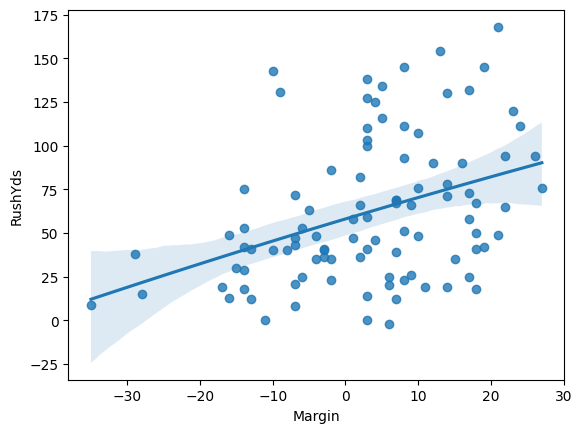

In [34]:
# plot margin versus yards

sns.regplot(jones_career, x = 'Margin', y = 'RushYds', order = 2)

<Axes: xlabel='Time', ylabel='RushYds'>

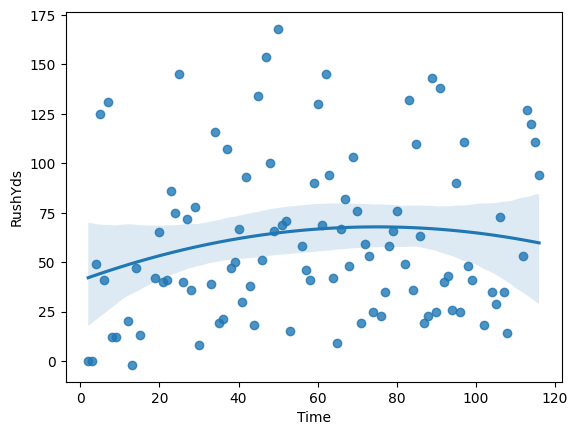

In [36]:
# plot AJ's production over time:

sns.regplot(jones_career, x = 'Time', y = 'RushYds', order = 2)